1
3
5
[[0.00031601768782423407, 0.0005917278222489869, 0.000864759882916195, 0.0011359353400674744, 0.001409759308521725, 0.0016829216583402304, 0.0019569483513356377, 0.002234282319310979, 0.002507574735788696]]
[[0.00031601768782423407, 0.0005917278222489869, 0.000864759882916195, 0.0011359353400674744, 0.001409759308521725, 0.0016829216583402304, 0.0019569483513356377, 0.002234282319310979, 0.002507574735788696], [0.00031601768782423407, 0.0005917254626240942, 0.0008680174285457355, 0.001142405491063023, 0.001416847729676281, 0.0016924388695434322, 0.0019676772101609153, 0.0022372554009818966, 0.002508549831773798]]
[[0.00031601768782423407, 0.0005917278222489869, 0.000864759882916195, 0.0011359353400674744, 0.001409759308521725, 0.0016829216583402304, 0.0019569483513356377, 0.002234282319310979, 0.002507574735788696], [0.00031601768782423407, 0.0005917254626240942, 0.0008680174285457355, 0.001142405491063023, 0.001416847729676281, 0.0016924388695434322, 0.0019676772101609153, 0.002

'       \nBase_line = 0\nlight_curve_x = []\n\nfor i in range(len(hist_starage)):\n    light_curve_x.append()\n    light_curve_y.append()\n'

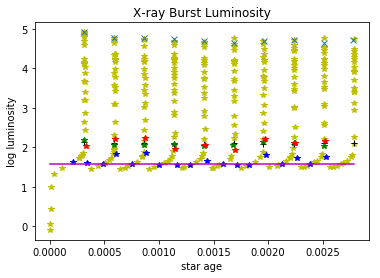

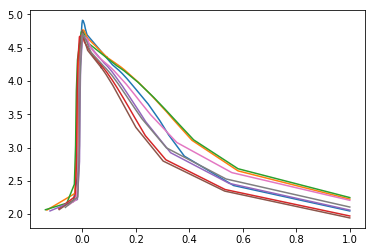

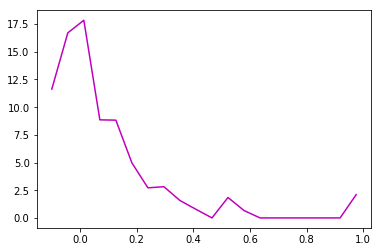

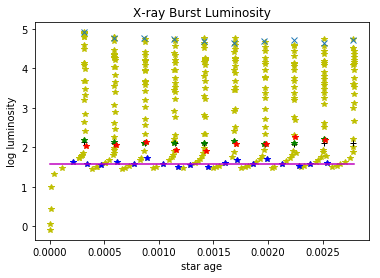

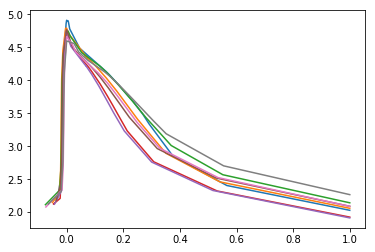

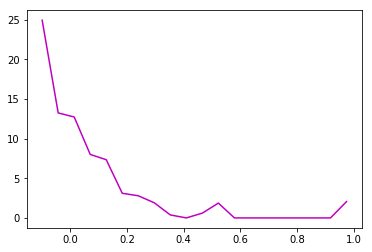

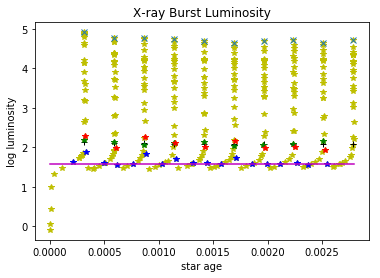

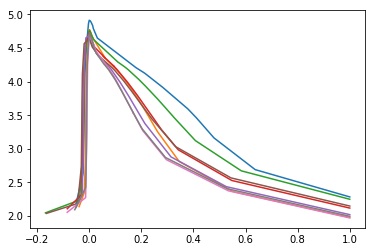

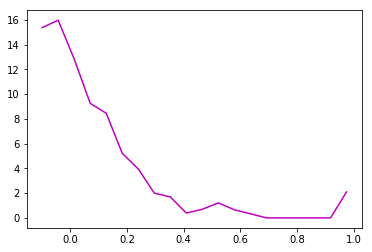

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import isfile, join
import pandas as pd
#from scipy.signal import find_peaks
#%matplotlib notebook
# This is all for reading in the file data 
# It will be changed so that multiple burst histories are read in

hist_starage = []
hist_loglum = []
hist_avgburst = []
hist_peaksx = []
hist_peaksy = []
hist_startx = []
hist_starty = []
hist_stopx = []
hist_stopy = []
hist_blxleft = []
hist_blyleft = []
hist_blxright = []
hist_blyright = []
hist_avglum = []
hist_burstsx = []
hist_burstsy = []
hist_peaks2avg = []

#hist_starage = [[0 for x in range(num_files)] for y in range(len(profile_mass_fracs))] 
path_1 = r'/Users/beecontreras/Desktop/2019_Duke_TUNL_REU/runs_x100_1/'
path_2 = '/LOGS/history.txt'
num_files = 6
for i in range(1, num_files, 2):
    print(i)
    s = str(i)
    final_path = path_1 + s + path_2
    with open(final_path, 'r') as f:

        info_starts = 0
        data = []
        all_models = []

        for line in f:

            info_starts += 1

            model_info = line.split(" ")    # splits the individual numbers in the lines

            model_info = np.array(list(filter(None, model_info)))[:-1:]

            if info_starts >= 7:     # This is where we care about the data

                model_elements = model_info.astype(float)

                all_models.append(model_elements)

                num_models = len(all_models)

       # info_starts = 0 # !!! A D D E D   O N !!!

    star_age = []
    log_lum = []
    starage_column = 1
    loglum_column = 36
    row_num = []
    # This creates lists for star age and log luminosity
   # print(all_models)
    for j in range(num_models):
        row_num.append(j)
        star_age.append(all_models[j][starage_column])
        log_lum.append(all_models[j][loglum_column])

    hist_starage.append(star_age)
    hist_loglum.append(log_lum)
    
    # Changes the above lists into arrays so calculations can be done
    star_age = np.array(list(star_age))
    log_lum = np.array(list(log_lum))
    
hist_starage = np.array(list(hist_starage))
hist_loglum = np.array(list(hist_loglum))


for i in range(len(hist_starage)):
    """
    plt.figure(i)

    #plt.ylim(0,5.2)
    #plt.xlim(.002360660,.0030)
    # Plots data from above
    plt.plot(hist_starage[i], hist_loglum[i], 'y*')
    plt.ylabel('log luminosity')
    plt.xlabel('star age')
    plt.title('X-ray Burst Luminosity') 
    """
    peaks_x = []
    peaks_y = []
    x = []
    y = []
    av_lum = []
    total = 0

    # Filling lists with differences of luminosity points (i'm not entirely sure about the if statement here - it might be repetitive)
    #print(len(hist_loglum[i])-1)
    for n in range(len(hist_loglum[i]) - 1):  
            x.append(hist_loglum[i][n]-hist_loglum[i][n-1]) 
            y.append(hist_loglum[i][n+1]-hist_loglum[i][n]) 
            if hist_loglum[i][n] > 0 and hist_loglum[i][n+1] - hist_loglum[i][n] < .01:
                av_lum.append(hist_loglum[i][n])
    # Finds peaks by saying that if luminosities are increasing and then switch to decreasing at a luminosity point
    # then that point is a peak if it's above a certain threshold (4.5) - I might tweak this to make it more
    # sure fire and accurate
    row_check = []
    for k in range(len(x)):
        if x[k] > 0 and y[k] < 0 and hist_loglum[i][k] > 4.5:
            row_check.append(row_num[k])
            peaks_x.append(hist_starage[i][k])
            peaks_y.append(hist_loglum[i][k])
    #row_check = []
    # Potential Fix for any issue with extra peaks included
    #for k in range(len(x)):
        #if x[k] > 0 and y[k] < 0 and log_lum[k] > 4.5:
            #row_check.append(row_num[k])
            #peaks_x.append(star_age[k]*31536000)
            #peaks_y.append(log_lum[k])
            
    #print(len(peaks_x), '\n')
    #print(len(row_check), '\n')
    #print(row_check, '\n')
    row_check = np.array(list(row_check))
    offset = 0
    for m in range(len(row_check)-1):
        if (row_check[m+1] - row_check[m]) < 20:
            #print(m)
            #for
            if peaks_y[m - offset] < peaks_y[(m-offset)+1]: 
                peaks_y.remove(peaks_y[(m-offset)])        #
                peaks_x.remove(peaks_x[(m-offset)])
                offset += 1                                   
            else: 
                peaks_y.remove(peaks_y[(m-offset)+1]) 
                peaks_x.remove(peaks_x[(m-offset)+1])
                offset += 1
    ################################################
    #for j in range(len(peaks_x)-2):               #
        #if abs(peaks_x[j+1] - peaks_x[j]) < .0000001: 

            #if peaks_y[j] < peaks_y[j+1]:         #
                #peaks_y.remove(peaks_y[j])        #
               # peaks_x.remove(peaks_x[j])        #
           # else:                                 #
                #peaks_y.remove(peaks_y[j+1])      #
                #peaks_x.remove(peaks_x[j+1])      #  
    ################################################
    hist_peaksx.append(peaks_x)
    hist_peaksy.append(peaks_y)
#!!!    #plt.plot(peaks_x, peaks_y, 'x')        

    sum_lum = 0.
    avg_sum = hist_loglum[i][5]
    count = 1.

    blpoint_y_left = [] # will hold luminosity info. for point that is closest to the avg. baseline (blpoint) on the left for each peak
    blpoint_x_left = [] # will hold star age info. for point that is closest to the avg. baseline (blpoint) on the left for each peak

    blpoint_y_right = [] # will hold luminosity info. for point that is closest to the avg. baseline (blpoint) on the right for each peak
    blpoint_x_right = [] # will hold star age info. for point that is closest to the avg. baseline (blpoint) on the right for each peak
    #These points will later be plotted in blue

    # This starts counting the points along the baseline to find avg. luminosity 
    # If the point deviates .3 from the running avg. then it's ignored

    for k in range (5, len(hist_starage[i])-1):
        if abs(hist_loglum[i][k]-avg_sum) < .3 :
            count += 1
            sum_lum = sum_lum + hist_loglum[i][k]
            avg_lum = sum_lum / count

    hist_avglum.append(avg_lum)
    
    peaks_to_avg = []
    end_burst = []
    burst_fraction = 1/6

    # This plots the point at a fraction between the peak and avg. baseline for each purst (black plus sign)
    for j in range(len(peaks_y)):
        peaks_to_avg.append(peaks_y[j]-avg_lum)
        #plt.plot(peaks_x[j], (peaks_to_avg[j]*(burst_fraction))+avg_lum,'+k')
        end_burst.append((peaks_to_avg[j]*(burst_fraction))+avg_lum)
    #print(end_burst)
    hist_peaks2avg.append(peaks_to_avg)
    peak_rise = []
    start_point = [] 
    inc_points = []
    dec_points = []
    on_decrease = False
    on_increase = True

    # This goes through all of the points and finds which points of a burst are closest to the avg. baseline
    # on either side of the burst's peak
    # This becomes very useful later, when finding start and stop points of the x-ray burst

    # Finds x & y information for points to the left of the peaks
    for k in range(5, len(hist_starage[i])-1):
        if hist_loglum[i][k] < 2.0 and hist_loglum[i][k] > 1.50:
            if hist_loglum[i][k+1] - hist_loglum[i][k] > 0 and hist_loglum[i][k] - hist_loglum[i][k-1] > 0:
                on_decrease = False
                inc_points.append(hist_loglum[i][k])
            if hist_loglum[i][k+1] - hist_loglum[i][k] < 0 and hist_loglum[i][k] - hist_loglum[i][k-1] < 0:
                if on_decrease == False:
                    blpoint_y_left.append(min(inc_points, key=lambda x:abs(x-avg_lum)))
                    blpoint_x_left.append(hist_starage[i][np.where(hist_loglum[i] == min(inc_points, key=lambda x:abs(x-avg_lum)))[0][0]])
                    inc_points = []
                    on_decrease = True

    # Finds x & y information for points to the right of the peaks                
    for j in range(5, len(hist_starage[i])-1):
        if hist_loglum[i][j] < 2.0 and hist_loglum[i][j] > 1.50:
            if hist_loglum[i][j+1] - hist_loglum[i][j] < 0 and hist_loglum[i][j] - hist_loglum[i][j-1] < 0:
                on_increase = False
                dec_points.append(hist_loglum[i][j])
            if hist_loglum[i][j+1] - hist_loglum[i][j] > 0 and hist_loglum[i][j] - hist_loglum[i][j-1] > 0:
                if on_increase == False:
                    blpoint_y_right.append(min(dec_points, key=lambda x:abs(x-avg_lum)))
                    
                   # print(np.where(hist_loglum[i] == min(dec_points, key=lambda x:abs(x-avg_lum)))[0][0])
        
                   # print(hist_loglum[i])
                    
                    
                    blpoint_x_right.append(hist_starage[i][np.where(hist_loglum[i] == min(dec_points, key=lambda x:abs(x-avg_lum)))[0][0]])
                    dec_points = []
                    on_increase = True 
            if j == len(hist_starage[i]) - 2:
                    blpoint_y_right.append(hist_loglum[i][-1])
                    blpoint_x_right.append(hist_starage[i][-1])
                    
    hist_blxleft.append(blpoint_x_left)
    hist_blyleft.append(blpoint_y_left)
    hist_blxright.append(blpoint_x_right)
    hist_blyright.append(blpoint_y_right)

    # This takes in points on either side of the peaks up to some specified fraction
    # between the peak and the avg. baseline.

    start_point_y = []
    start_point_x = []
    peak_rise_y = []
    peak_rise_x = []
    log_rise = []

    # Finds the starting points - looking at points between a burst's peak and the closest point
    # the burst has to the avg. baseline
    

   # print(len(blpoint_x_left)) # 9
    #print(len(peaks_y)) #10
   # print(len(star_age))
    for k in range(len(peaks_y)-1):
        #print(peaks_x[k])
        for j in range(len(hist_starage[i])):
            #print(j)
            if hist_starage[i][j] < peaks_x[k] and hist_starage[i][j] > blpoint_x_left[k]:
                peak_rise_y.append(abs(hist_loglum[i][j] - end_burst[k]))
                #print(peak_rise_y)
                log_rise.append(hist_loglum[i][j])
                peak_rise_x.append(hist_starage[i][j])
        start_point_y.append(log_rise[peak_rise_y.index(min(peak_rise_y))]) 
        start_point_x.append(peak_rise_x[peak_rise_y.index(min(peak_rise_y))])

        #!!!!!!!!!!!!!!!!!!!!!!
        peak_rise_y = []
        log_rise = []
        peak_rise_x = []

    
    stop_point_y = []
    stop_point_x = []
    peak_fall_y = []
    peak_fall_x = []
    log_fall = []

    # Finds the stopping points the same way as done above for starting points
    for k in range(len(peaks_y)-1):
        for j in range(len(hist_starage[i])):
            if hist_starage[i][j] > peaks_x[k] and hist_starage[i][j] < blpoint_x_right[k]:
                #print(k)
                peak_fall_y.append(abs(hist_loglum[i][j] - end_burst[k]))
                log_fall.append(hist_loglum[i][j])
                peak_fall_x.append(hist_starage[i][j])
        stop_point_y.append(log_fall[peak_fall_y.index(min(peak_fall_y))]) 
        stop_point_x.append(peak_fall_x[peak_fall_y.index(min(peak_fall_y))])
        peak_fall_y = []
        log_fall = []
        peak_fall_x = []
    
    hist_startx.append(start_point_x)
    hist_starty.append(start_point_y)
    hist_stopx.append(stop_point_x)
    hist_stopy.append(stop_point_y)
    print(hist_startx)
    """
    # These plot the start points (green) and the stop points (red)
    plt.plot(start_point_x, start_point_y, '*g')
    plt.plot(stop_point_x, stop_point_y, '*r')

    # This plots the points closest to the avg. baseline on either side of the peak
    plt.plot(blpoint_x_left, blpoint_y_left, 'b*')
    plt.plot(blpoint_x_right, blpoint_y_right, 'b*')

    # Plots the avg. basline
    plt.plot(hist_starage[i], np.ones(len(hist_starage[i]))*avg_lum, 'm' )
    plt.figure(i+1)
    """
    ####################################################################################
    # Puts sequential x-ray bursts on top of each other

    xray_bursts_x = []
    xray_bursts_y = []
    bursts_y = []
    bursts_x = []

    # Takes in all of the points inbetween the start and stop points
    # along both the x and y axis
    for j in range(len(stop_point_x)):
        for k in range(len(hist_starage[i])):
            if hist_starage[i][k] >= start_point_x[j] and hist_starage[i][k] <= stop_point_x[j]:
                xray_bursts_y.append(hist_loglum[i][k])
                xray_bursts_x.append(hist_starage[i][k])

        bursts_y.append(xray_bursts_y)
        bursts_x.append(xray_bursts_x)
        xray_bursts_x = []
        xray_bursts_y = []

    # This starts all of the burst plots at zero
    # by subtracting all points by the star age the 
    #particular burst begins at
    # and gives them a fixed width of one (figure out unit)
    #print(bursts_x)
   # start = bursts_x[i][0]
    #peak_start = peaks_x[i]
    #for j in range(len(bursts_x[i])):
        #bursts_x[i][j] = bursts_x[i][j] - peak_start
        
    for k in range(len(bursts_x)): 
        start = bursts_x[k][0]
        peak_start = peaks_x[k]
        for j in range(len(bursts_x[k])):
            bursts_x[k][j] = bursts_x[k][j] - peak_start
        fixed_width = bursts_x[k][-1]
        #print(fixed_width)
        for j in range(len(bursts_x[k])):
            bursts_x[k][j] = bursts_x[k][j] / fixed_width

    # Plots start and stop point        
   # for j in range(len(bursts_y)-1):
        #plt.plot(bursts_x[j],bursts_y[j])
    #plt.figure(i+2)
    hist_burstsx.append(bursts_x)
    hist_burstsy.append(bursts_y)
    ################################################################################ 
    # This put all of the points into bins and then averages the bins over all bursts
    burst_hist = []

    for k in range(len(bursts_y)-1):
        #print(bursts_x[k])
        burst_hist.append(np.histogram(bursts_x[k], 20,weights = bursts_y[k]))
        # Here, we say 20 bins because the number of points ranges from ~23 - 31 and you want less bins than points

   # for j in range(len(bursts_y)-1):
    #    plt.bar(burst_hist[j][1][:-1:], burst_hist[j][0], width = 0.05, align = 'edge')
    #plt.figure(i+3)    
    count = 1
    burst_avg = []
    point_sums = 0

    # This is where the bins are averaged over the bursts
    for k in range(len(burst_hist[0][0])):
        count = 0
        for j in range(len(bursts_y)-1):
            point_sums += burst_hist[j][0][k]
            count += 1
        point_sums = point_sums/count
        burst_avg.append(point_sums)
        point_sums = 0

    hist_avgburst.append(burst_avg)
    
##########################################!!! A D D E D  I N !!!##################################################
n = 0
for i in range(len(hist_starage)):
    #print(len(hist_starage))
    print(n)
    n += 1
    print(n)
    #for k in range(len(hist_starage)):
    plt.figure(n)
    n += 1
    print(n)
    #plt.ylim(0,5.2)
    #plt.xlim(.002360660,.0030)
    # Plots data from above
    plt.plot(hist_starage[i], hist_loglum[i], 'y*')
    plt.ylabel('log luminosity')
    plt.xlabel('star age')
    plt.title('X-ray Burst Luminosity') 

    plt.plot(peaks_x, peaks_y, 'x')

    for j in range(len(hist_peaksy[i])):
        plt.plot(hist_peaksx[i][j], (hist_peaks2avg[i][j]*(burst_fraction))+hist_avglum[i],'+k')

    # These plot the start points (green) and the stop points (red)
    plt.plot(hist_startx[i], hist_starty[i], '*g')
    plt.plot(hist_stopx[i], hist_stopy[i], '*r')

    # This plots the points closest to the avg. baseline on either side of the peak
    plt.plot(hist_blxleft[i], hist_blyleft[i], 'b*')
    plt.plot(hist_blxright[i], hist_blyright[i], 'b*')

    # Plots the avg. basline
    plt.plot(hist_starage[i], np.ones(len(hist_starage[i]))*hist_avglum[i], 'm' )
    plt.figure(n)
    n += 1
    print(n)
    for j in range(len(hist_burstsy[i])-1):
        plt.plot(hist_burstsx[i][j],hist_burstsy[i][j])
    plt.figure(n)

   # for j in range(len(bursts_y)-1):
               # plt.bar(burst_hist[j][1][:-1:], burst_hist[j][0], width = 0.05, align = 'edge')
   # plt.figure(a+(4*a))    
#################################################################################################################
    x_axis = np.linspace(-0.10, 0.975, len(burst_hist[0][0]))
    #plt.ylim(1.5, 2.5)
   # plt.xlim(-0.025,0.025)
    plt.plot(x_axis, hist_avgburst[i], 'm')

"""       
Base_line = 0
light_curve_x = []

for i in range(len(hist_starage)):
    light_curve_x.append()
    light_curve_y.append()
"""   

In [2]:
print(len(hist_starage))

2


In [130]:
# Burst Frequency

peak_dist_sum = 0

for i in range(len(peaks_x)-1):
    
    peak_dist_sum += (peaks_x[i+1]- peaks_x[i])
    #gets sum distance between all peaks

burst_frequency = peak_dist_sum / (len(peaks_x)-1)
# divides by number of peaks (minus one b/c )


print(burst_frequency)

0.00027366201920625647


In [ ]:
# Peak Counter

for i in range()